# Data analytics project

## Context

Between January 2023 and August 2024, data has been collected on the number of overnight trips, the number of nights spent, and the average length of stay by foreign visitors across various types of accommodations. 

## Objective

The main objective of this study is to analyze and predict the average duration of international tourists' stays across diverse accommodation types via different machine learning methodologies.

## Problem statement

Predicting the typical length of stay for foreign visitors across a range of accommodations presents issues for the tourism sector. 
By examining past data and using various machine learning techniques to predict the average duration of stay, this study seeks to address this problem. 

## Exploratory Data Analysis

EDA involves summarizing the main characteristics of the dataset using statistical and visualization techniques. 

### Exploring the dataset

In [203]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

#importing fuctions from a ipynb
%run utilss.ipynb

#To read the file downloaded from the CSO.ie database
df = pd.read_csv('cso_data.csv', index_col=False)

In [204]:
#To get all the information realted to the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          600 non-null    object 
 1   Month                    600 non-null    object 
 2   Main Accommodation Type  600 non-null    object 
 3   UNIT                     600 non-null    object 
 4   VALUE                    600 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.6+ KB


In [205]:
#Shows the 5 first rows from the dataset
df.head()

,Statistic Label,Month,Main Accommodation Type,UNIT,VALUE
0,Number of Overnight Trips by Foreign Visitors,2023 January,Hotel/conference centre,Thousand,121.0
1,Number of Overnight Trips by Foreign Visitors,2023 January,Guest house/bed & breakfast,Thousand,8.5
2,Number of Overnight Trips by Foreign Visitors,2023 January,Friends/relatives/own property,Thousand,243.4
3,Number of Overnight Trips by Foreign Visitors,2023 January,Self catering/rented house,Thousand,13.8
4,Number of Overnight Trips by Foreign Visitors,2023 January,Other private tourism accommodation n.e.c.,Thousand,13.4


In [206]:
#To drop the feature Statistic Label
df = df.drop(columns=['Statistic Label'])

### Reorganazing the dataset

Reorganizing the dataset by creating new columns and assigning values from the existing `VALUE` column into these new features.


In [207]:
#Creates 5 new columns and asigned values from VALUE into the new features 
df['Number of Overnight Trips by Foreign Visitors (Thousand)'] = pd.Series(df['VALUE'].iloc[0:120].reset_index(drop=True))
df['Percentage of Overnight Trips by Foreign Visitors (%)'] = pd.Series(df['VALUE'].iloc[120:240].reset_index(drop=True))
df['Number of Nights by Foreign Visitors (Thousand)'] = pd.Series(df['VALUE'].iloc[240:360].reset_index(drop=True))
df['Percentage of Nights by Foreign Visitors (%)'] = pd.Series(df['VALUE'].iloc[360:480].reset_index(drop=True))
df['Average Length of Stay of Foreign Visitors (Nights per trip)'] = pd.Series(df['VALUE'].iloc[480:600].reset_index(drop=True))


In [208]:
df.head(120)

,Month,Main Accommodation Type,UNIT,VALUE,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip)
0,2023 January,Hotel/conference centre,Thousand,121.0,121.0,30.3,441.9,12.0,3.7
1,2023 January,Guest house/bed & breakfast,Thousand,8.5,8.5,2.1,55.9,1.5,6.6
2,2023 January,Friends/relatives/own property,Thousand,243.4,243.4,60.8,2701.9,73.1,11.1
3,2023 January,Self catering/rented house,Thousand,13.8,13.8,3.4,154.8,4.2,11.2
4,2023 January,Other private tourism accommodation n.e.c.,Thousand,13.4,13.4,3.3,341.6,9.2,25.5
...,...,...,...,...,...,...,...,...,...
115,2024 August,Guest house/bed & breakfast,Thousand,62.9,62.9,8.2,559.3,8.4,8.9
116,2024 August,Friends/relatives/own property,Thousand,290.9,290.9,38.1,2958.5,44.4,10.2
117,2024 August,Self catering/rented house,Thousand,43.3,43.3,5.7,483.7,7.3,11.2
118,2024 August,Other private tourism accommodation n.e.c.,Thousand,68.0,68.0,8.9,920.8,13.8,13.5


In [209]:
#To drop features VALUE and UNIT
df = df.drop(columns=['VALUE', 'UNIT'])
#To drop all the observations after index 120
df = df.drop(df.index[120:])

In [210]:
df.head(125)

,Month,Main Accommodation Type,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip)
0,2023 January,Hotel/conference centre,121.0,30.3,441.9,12.0,3.7
1,2023 January,Guest house/bed & breakfast,8.5,2.1,55.9,1.5,6.6
2,2023 January,Friends/relatives/own property,243.4,60.8,2701.9,73.1,11.1
3,2023 January,Self catering/rented house,13.8,3.4,154.8,4.2,11.2
4,2023 January,Other private tourism accommodation n.e.c.,13.4,3.3,341.6,9.2,25.5
...,...,...,...,...,...,...,...
115,2024 August,Guest house/bed & breakfast,62.9,8.2,559.3,8.4,8.9
116,2024 August,Friends/relatives/own property,290.9,38.1,2958.5,44.4,10.2
117,2024 August,Self catering/rented house,43.3,5.7,483.7,7.3,11.2
118,2024 August,Other private tourism accommodation n.e.c.,68.0,8.9,920.8,13.8,13.5


In [211]:
#to split the feature "Month" into "Month" and "Year"
df[['Year', 'Month']] = df['Month'].str.split(' ', expand=True)

#To change Year's datatype  
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

#To change month's datatype
df['Month'] = pd.to_datetime(df['Month'], format='%B')
df['Month'] = df['Month'].dt.month

In [212]:
df.tail(20)

,Month,Main Accommodation Type,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip),Year
100,5,Other private tourism accommodation n.e.c.,42.1,6.8,701.1,15.7,16.7,2024
101,5,All types of accommodation,622.3,100.0,4462.1,100.0,7.2,2024
102,6,Hotel/conference centre,308.5,46.1,1600.4,32.8,5.2,2024
103,6,Guest house/bed & breakfast,39.8,5.9,289.7,5.9,7.3,2024
104,6,Friends/relatives/own property,227.1,33.9,1754.2,36.0,7.7,2024
105,6,Self catering/rented house,36.3,5.4,321.1,6.6,8.8,2024
106,6,Other private tourism accommodation n.e.c.,57.7,8.6,911.4,18.7,15.8,2024
107,6,All types of accommodation,669.5,100.0,4876.9,100.0,7.3,2024
108,7,Hotel/conference centre,268.8,41.0,1415.8,26.8,5.3,2024
109,7,Guest house/bed & breakfast,40.9,6.2,310.5,5.9,7.6,2024


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Month                                                         120 non-null    int32  
 1   Main Accommodation Type                                       120 non-null    object 
 2   Number of Overnight Trips by Foreign Visitors (Thousand)      120 non-null    float64
 3   Percentage of Overnight Trips by Foreign Visitors (%)         120 non-null    float64
 4   Number of Nights by Foreign Visitors (Thousand)               120 non-null    float64
 5   Percentage of Nights by Foreign Visitors (%)                  120 non-null    float64
 6   Average Length of Stay of Foreign Visitors (Nights per trip)  120 non-null    float64
 7   Year                                                          120 non-nu

In [214]:
df.describe()

,Month,Number of Overnight Trips by Foreign Visitors (Thousand),Percentage of Overnight Trips by Foreign Visitors (%),Number of Nights by Foreign Visitors (Thousand),Percentage of Nights by Foreign Visitors (%),Average Length of Stay of Foreign Visitors (Nights per trip),Year
count,120.000000,120.000000,120.000000,120.00000,120.000000,120.00000,120.000000
mean,5.700000,182.068333,33.334167,1425.00000,33.332500,10.04750,2023.400000
std,3.208707,194.450136,34.420437,1540.59099,33.579368,6.67257,0.491952
min,1.000000,7.100000,2.100000,45.30000,1.500000,3.30000,2023.000000
25%,3.000000,26.850000,5.075000,333.37500,7.850000,6.37500,2023.000000
50%,5.500000,95.900000,20.550000,811.20000,19.650000,8.15000,2023.000000
75%,8.000000,266.700000,46.125000,1785.32500,44.600000,11.60000,2024.000000
max,12.000000,763.600000,100.000000,7337.70000,100.000000,56.00000,2024.000000


In [215]:
#To drop redundant observations
print(f"Set size before dropping redundant observations: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Set size after dropping redundant observations: {df.shape}")


Set size before dropping redundant observations: (120, 8)
Set size after dropping redundant observations: (120, 8)


In [216]:
#to create the csv of the modified dataset
df.to_csv('new_cso_data.csv', index=False)

In [217]:
#To call the function to filter the data by excluding the feature: "All types of accommodation"
df_filtered = load_filter_data('new_cso_data.csv', 'All types of accommodation')

### Tendency

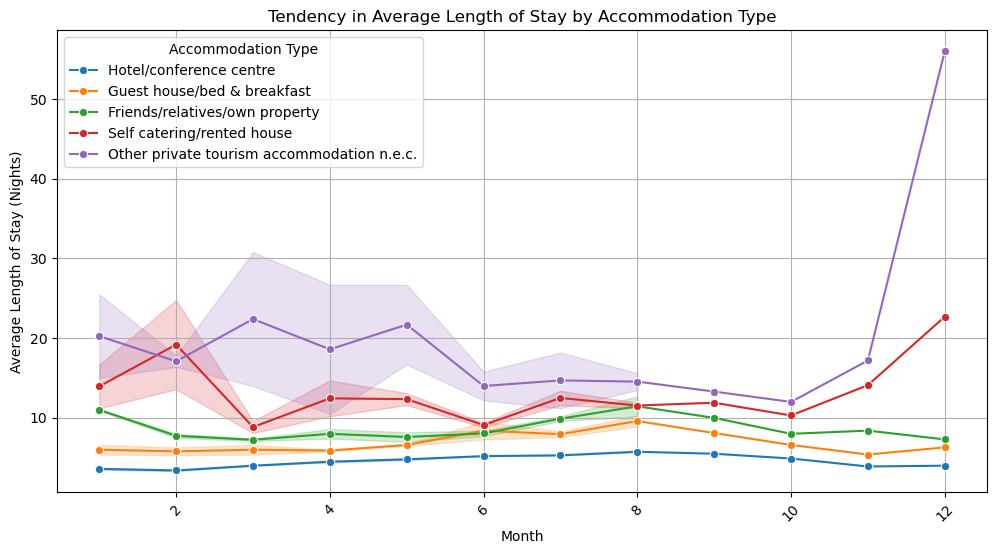

In [218]:
# Creates a tendency graphic
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Month', y='Average Length of Stay of Foreign Visitors (Nights per trip)', hue='Main Accommodation Type', marker='o')
plt.title('Tendency in Average Length of Stay by Accommodation Type')
plt.xlabel('Month')
plt.ylabel('Average Length of Stay (Nights)')
plt.xticks(rotation=45)
plt.legend(title='Accommodation Type')
plt.grid()
plt.show()


### Distribution

Distribution of the key variables in the dataset to identify patterns, trends, and potential outliers that could impact the analysis.

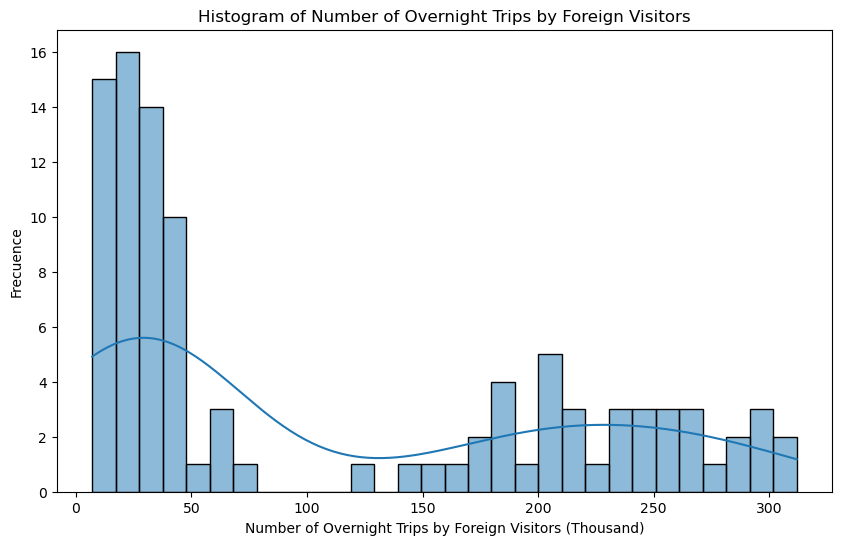

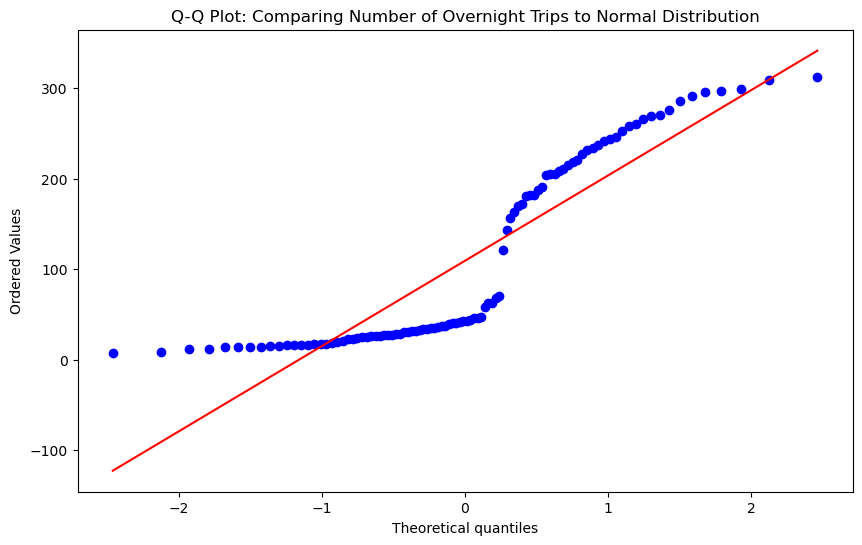

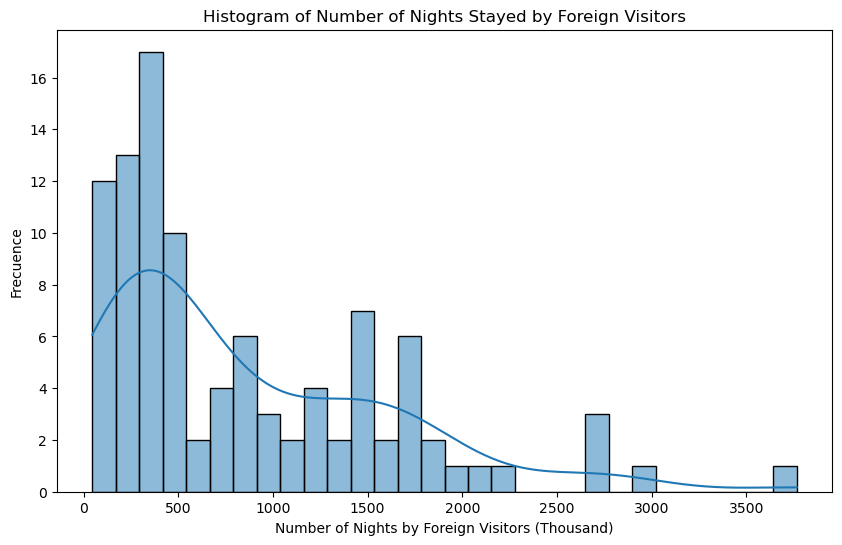

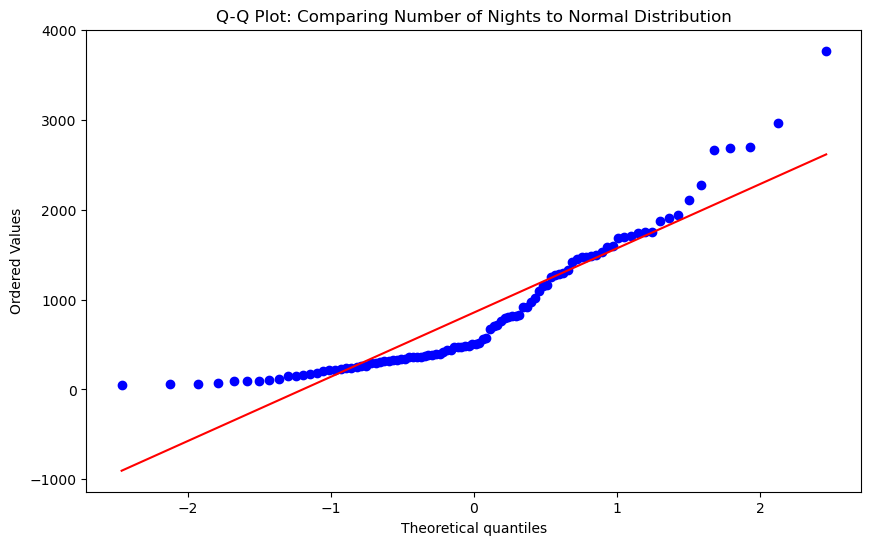

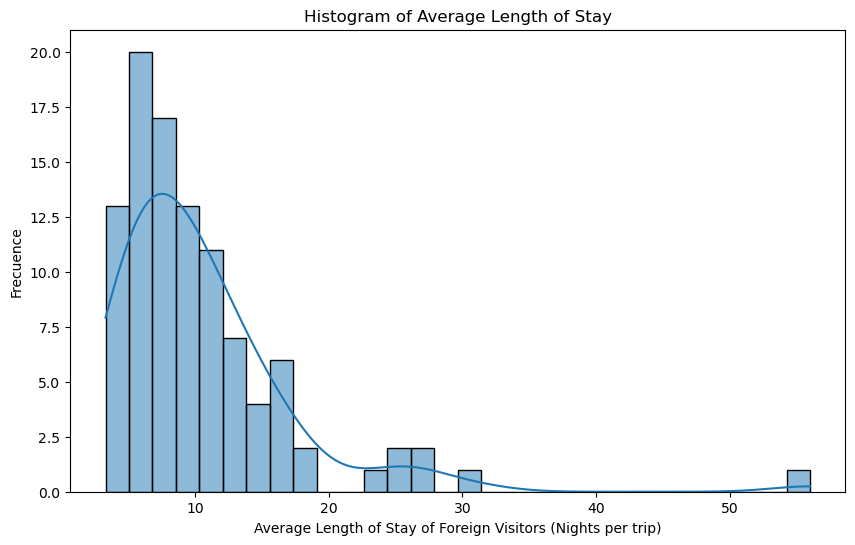

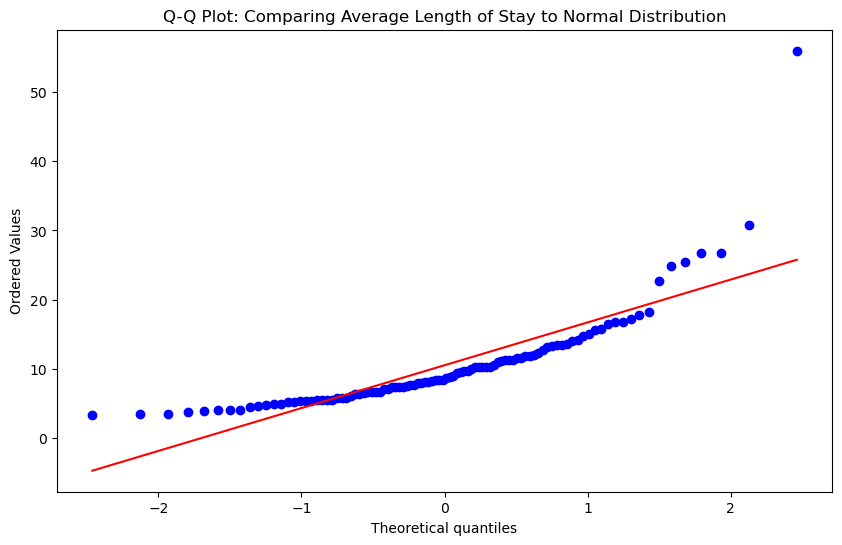

In [219]:


#To verify the distribution, creates an histogram and a Q-Q plot of Number of overnight trips and Number of nights stayed
feature = 'Number of Overnight Trips by Foreign Visitors (Thousand)'
data = df_filtered[feature].values

#Creates a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True)
plt.title('Histogram of Number of Overnight Trips by Foreign Visitors')
plt.xlabel(feature)
plt.ylabel('Frecuence')
plt.show()

# Creates a Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Comparing Number of Overnight Trips to Normal Distribution')
plt.show()


feature2 = 'Number of Nights by Foreign Visitors (Thousand)'
data2 = df_filtered[feature2].values

#Creates a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data2, bins=30, kde=True)
plt.title('Histogram of Number of Nights Stayed by Foreign Visitors')
plt.xlabel(feature2)
plt.ylabel('Frecuence')
plt.show()

# Creates a Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data2, dist="norm", plot=plt)
plt.title('Q-Q Plot: Comparing Number of Nights to Normal Distribution')
plt.show()

feature3 = 'Average Length of Stay of Foreign Visitors (Nights per trip)'
data3 = df_filtered[feature3].values

#Creates a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data3, bins=30, kde=True)
plt.title('Histogram of Average Length of Stay')
plt.xlabel(feature3)
plt.ylabel('Frecuence')
plt.show()

# Creates a Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data3, dist="norm", plot=plt)
plt.title('Q-Q Plot: Comparing Average Length of Stay to Normal Distribution')
plt.show()


In [220]:
#To split the dataset into groups by year
by_year = df_filtered.groupby('Year')

#Shapiro-Wilk test by year to get a statistical confirmation of the distribution
shapiro_results_overnights= {}
print('Number of Overnight Trips by Foreign Visitors (Thousand)')
for year, group in by_year:
    stat, p_value= shapiro(group['Number of Overnight Trips by Foreign Visitors (Thousand)'])
    shapiro_results_overnights[year]= {'Statistics': stat, 'p-value': p_value}

#Loop to show results by year
for year, result in shapiro_results_overnights.items():
    print(f"Year: {year}, Shapiro-Wilk Test: Statistics={result['Statistics']}, p-value={result['p-value']}")


shapiro_results_nights= {}
print('\nNumber of Nights by Foreign Visitors (Thousand)')
for year, group in by_year:
    stat, p_value= shapiro(group['Number of Nights by Foreign Visitors (Thousand)'])
    shapiro_results_nights[year]= {'Statistics': stat, 'p-value': p_value}

#Loop to show results by year
for year, result in shapiro_results_nights.items():
    print(f"Year: {year}, Shapiro-Wilk Test: Statistics={result['Statistics']}, p-value={result['p-value']}")


shapiro_results_average= {}
print('\nAverage Length of Stay of Foreign Visitors (Nights per trip)')
for year, group in by_year:
    stat, p_value= shapiro(group['Average Length of Stay of Foreign Visitors (Nights per trip)'])
    shapiro_results_average[year]= {'Statistics': stat, 'p-value': p_value}

#Loop to show results by year
for year, result in shapiro_results_average.items():
    print(f"Year: {year}, Shapiro-Wilk Test: Statistics={result['Statistics']}, p-value={result['p-value']}")


Number of Overnight Trips by Foreign Visitors (Thousand)
Year: 2023, Shapiro-Wilk Test: Statistics=0.7943445236191108, p-value=9.786312382023767e-08
Year: 2024, Shapiro-Wilk Test: Statistics=0.8056541346472592, p-value=8.905279815296568e-06

Number of Nights by Foreign Visitors (Thousand)
Year: 2023, Shapiro-Wilk Test: Statistics=0.8454348148030089, p-value=2.239924805800112e-06
Year: 2024, Shapiro-Wilk Test: Statistics=0.8703441633009102, p-value=0.00029201577720950787

Average Length of Stay of Foreign Visitors (Nights per trip)
Year: 2023, Shapiro-Wilk Test: Statistics=0.7231257354096664, p-value=2.5434651333630874e-09
Year: 2024, Shapiro-Wilk Test: Statistics=0.9371620844034774, p-value=0.027769937188239797


### Outlier detection

Identifying and removing outliers of each feature to ensure the accuracy of the analysis

#### Identifying outliers

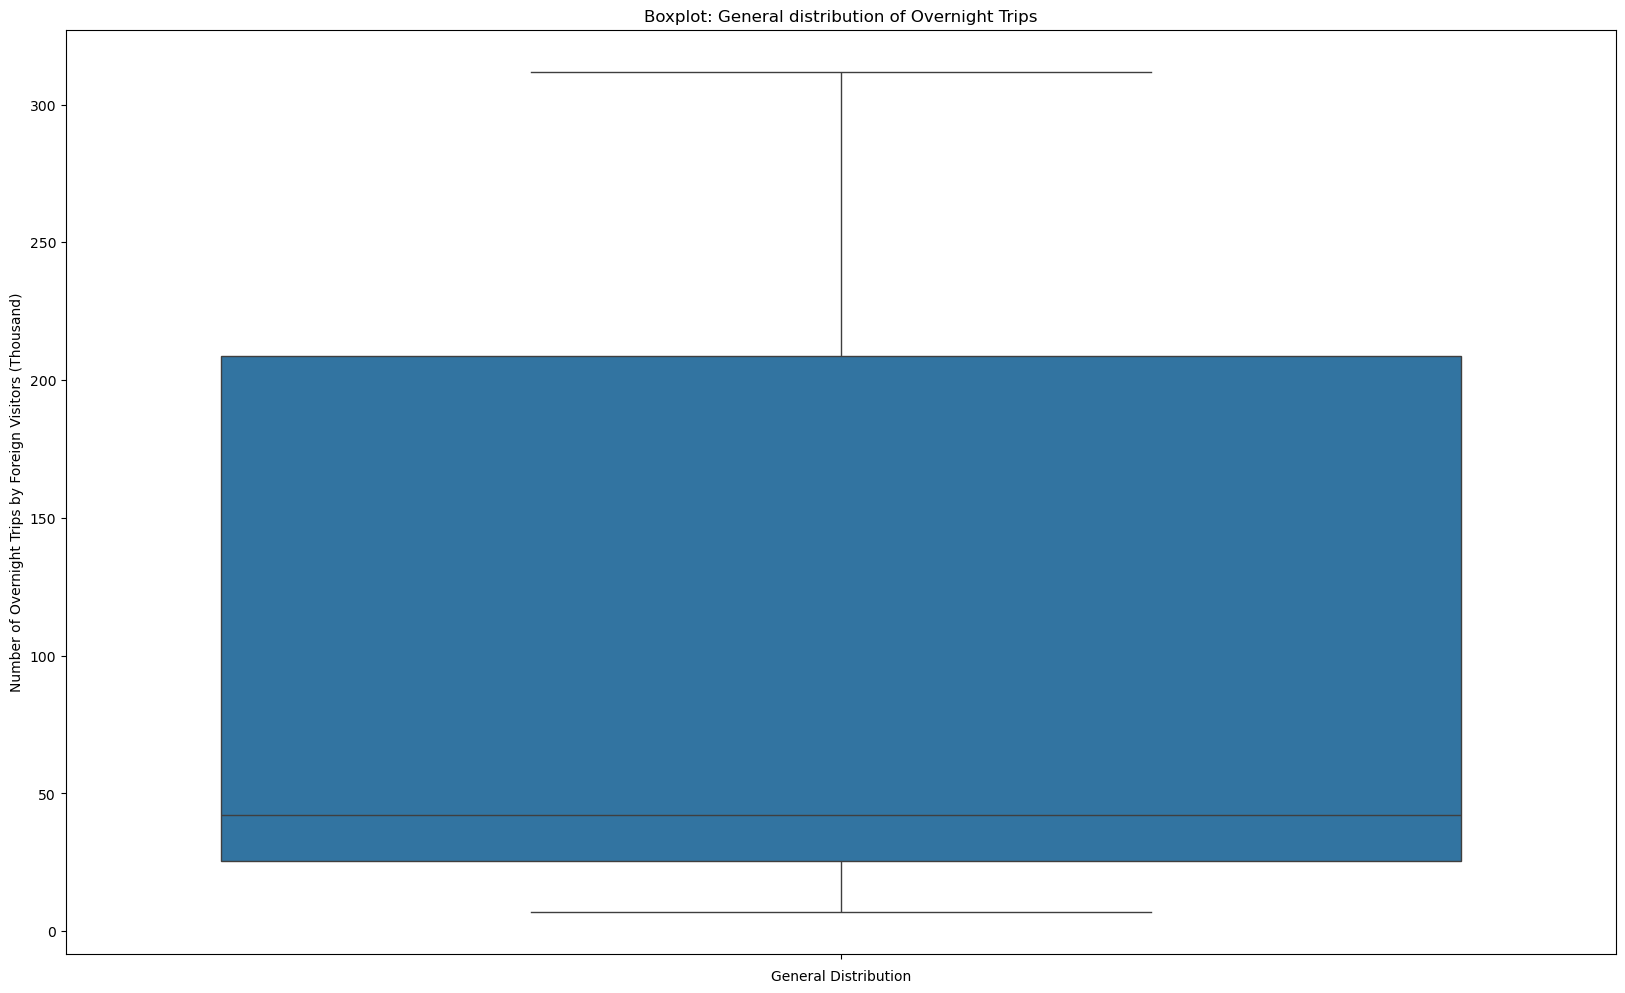

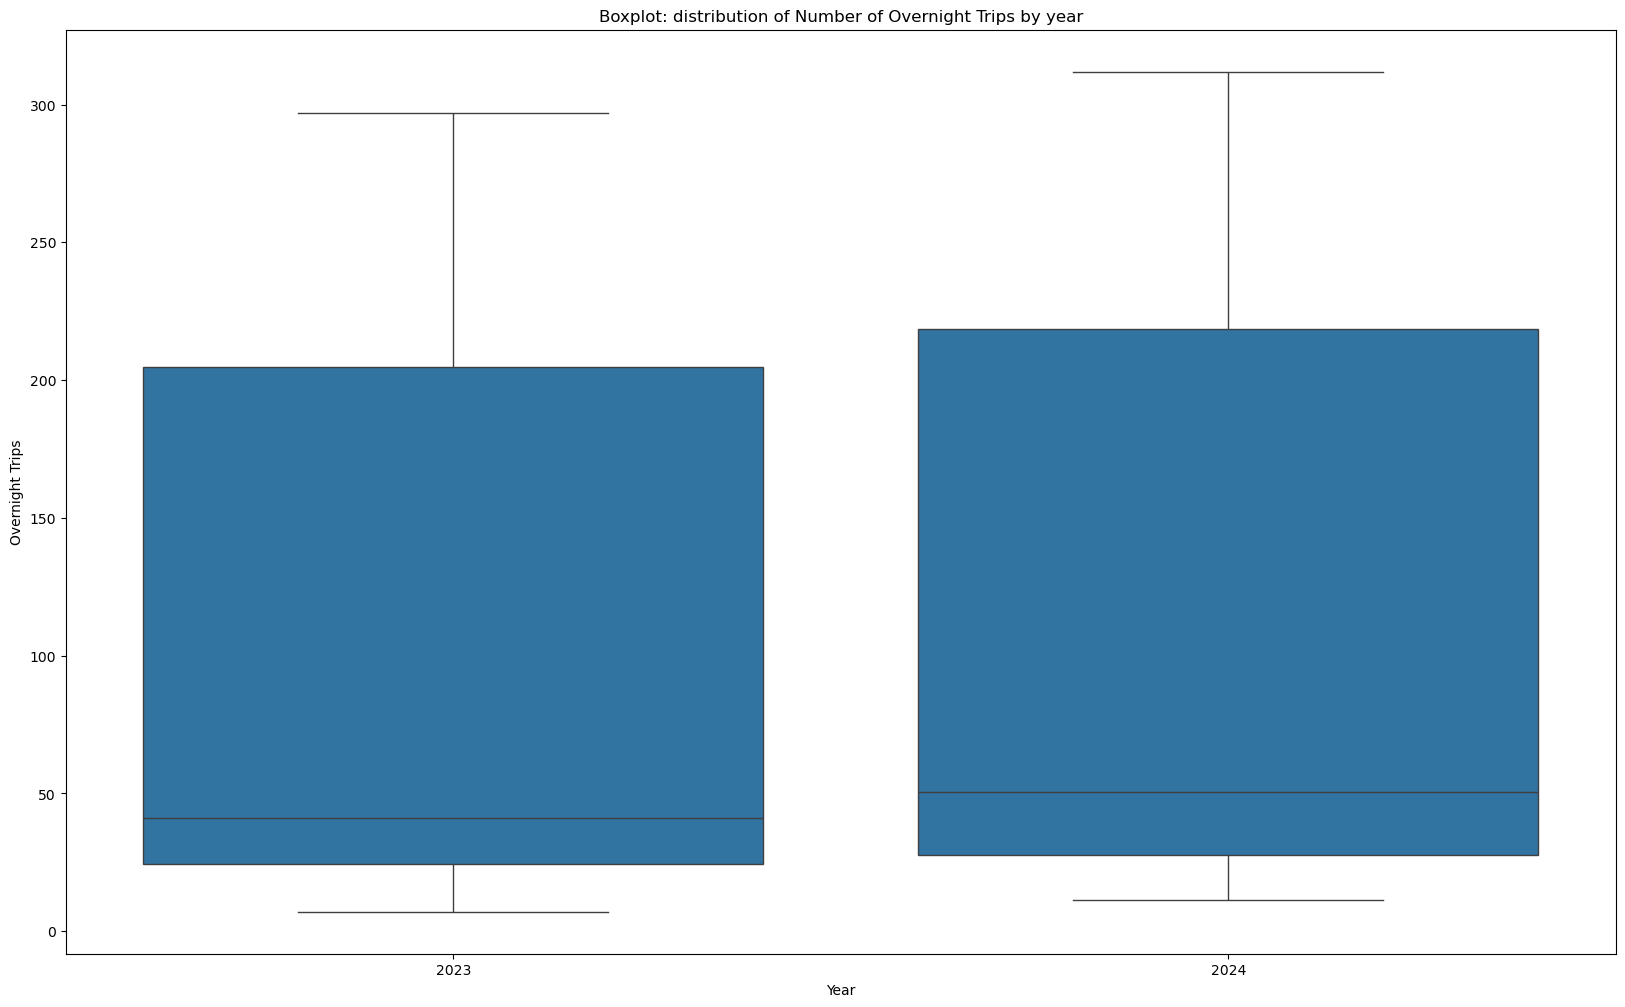

In [221]:
#Creates a boxplot to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(y='Number of Overnight Trips by Foreign Visitors (Thousand)', data=df_filtered)
plt.title('Boxplot: General distribution of Overnight Trips')
plt.xlabel('General Distribution')
plt.ylabel('Number of Overnight Trips by Foreign Visitors (Thousand)')
plt.show()


#Creates a boxplot for each year to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Number of Overnight Trips by Foreign Visitors (Thousand)', data=df_filtered)
plt.title('Boxplot: distribution of Number of Overnight Trips by year')
plt.xlabel('Year')
plt.ylabel('Overnight Trips')
plt.show()

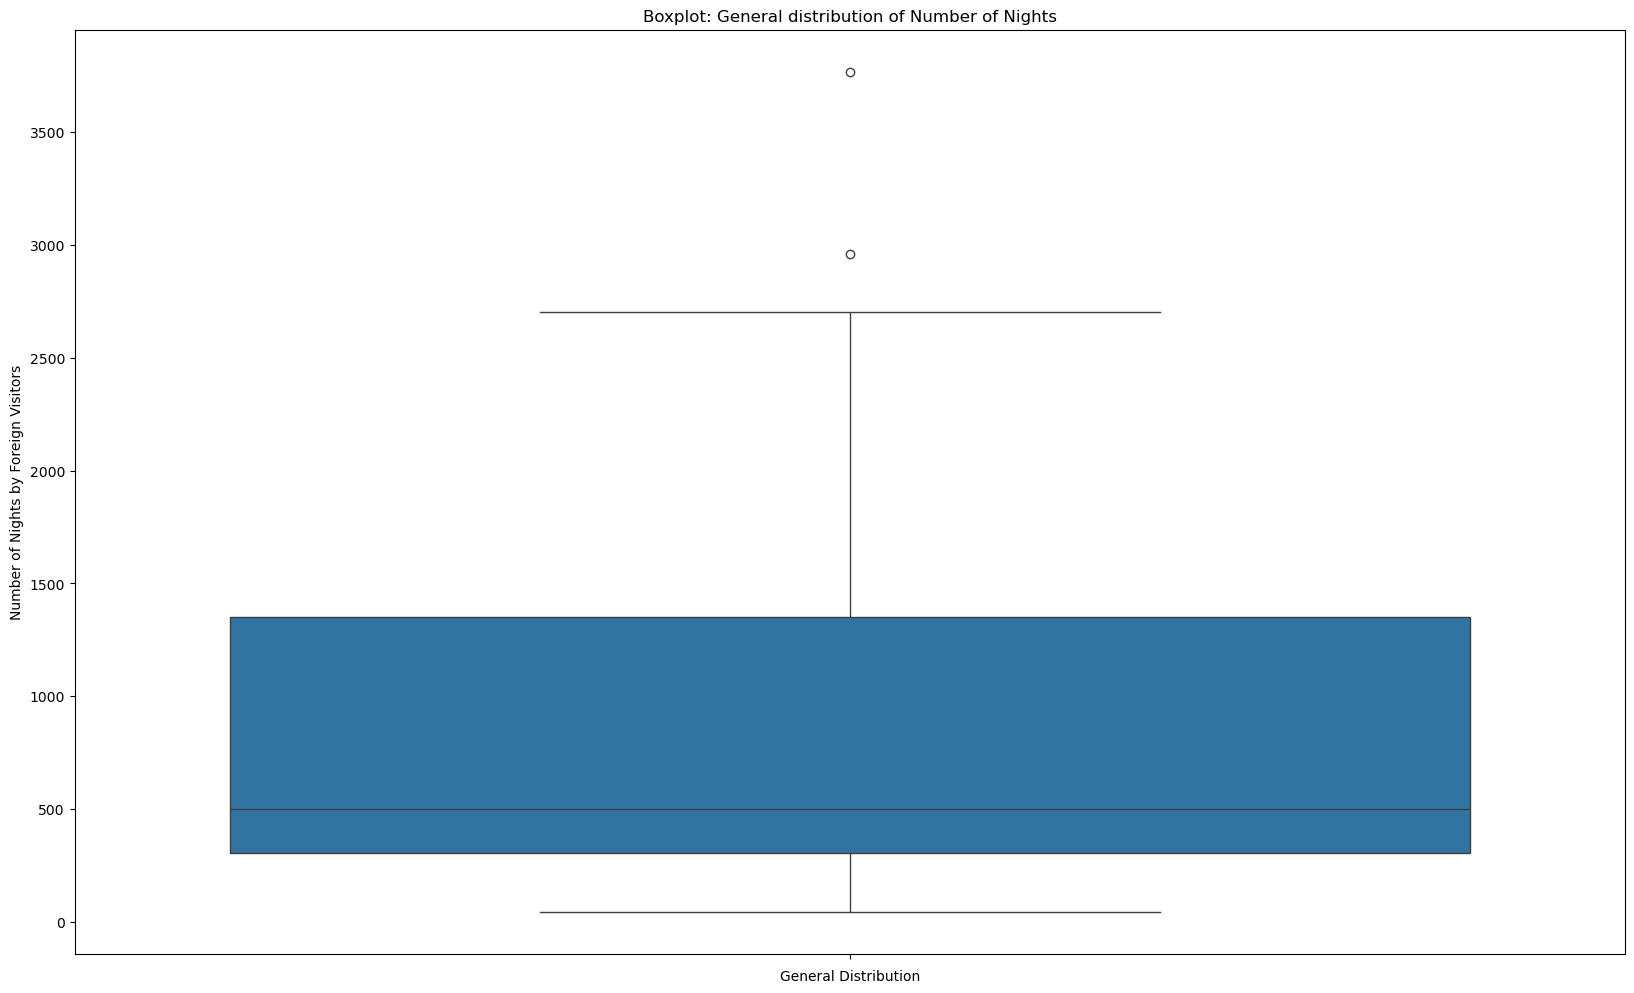

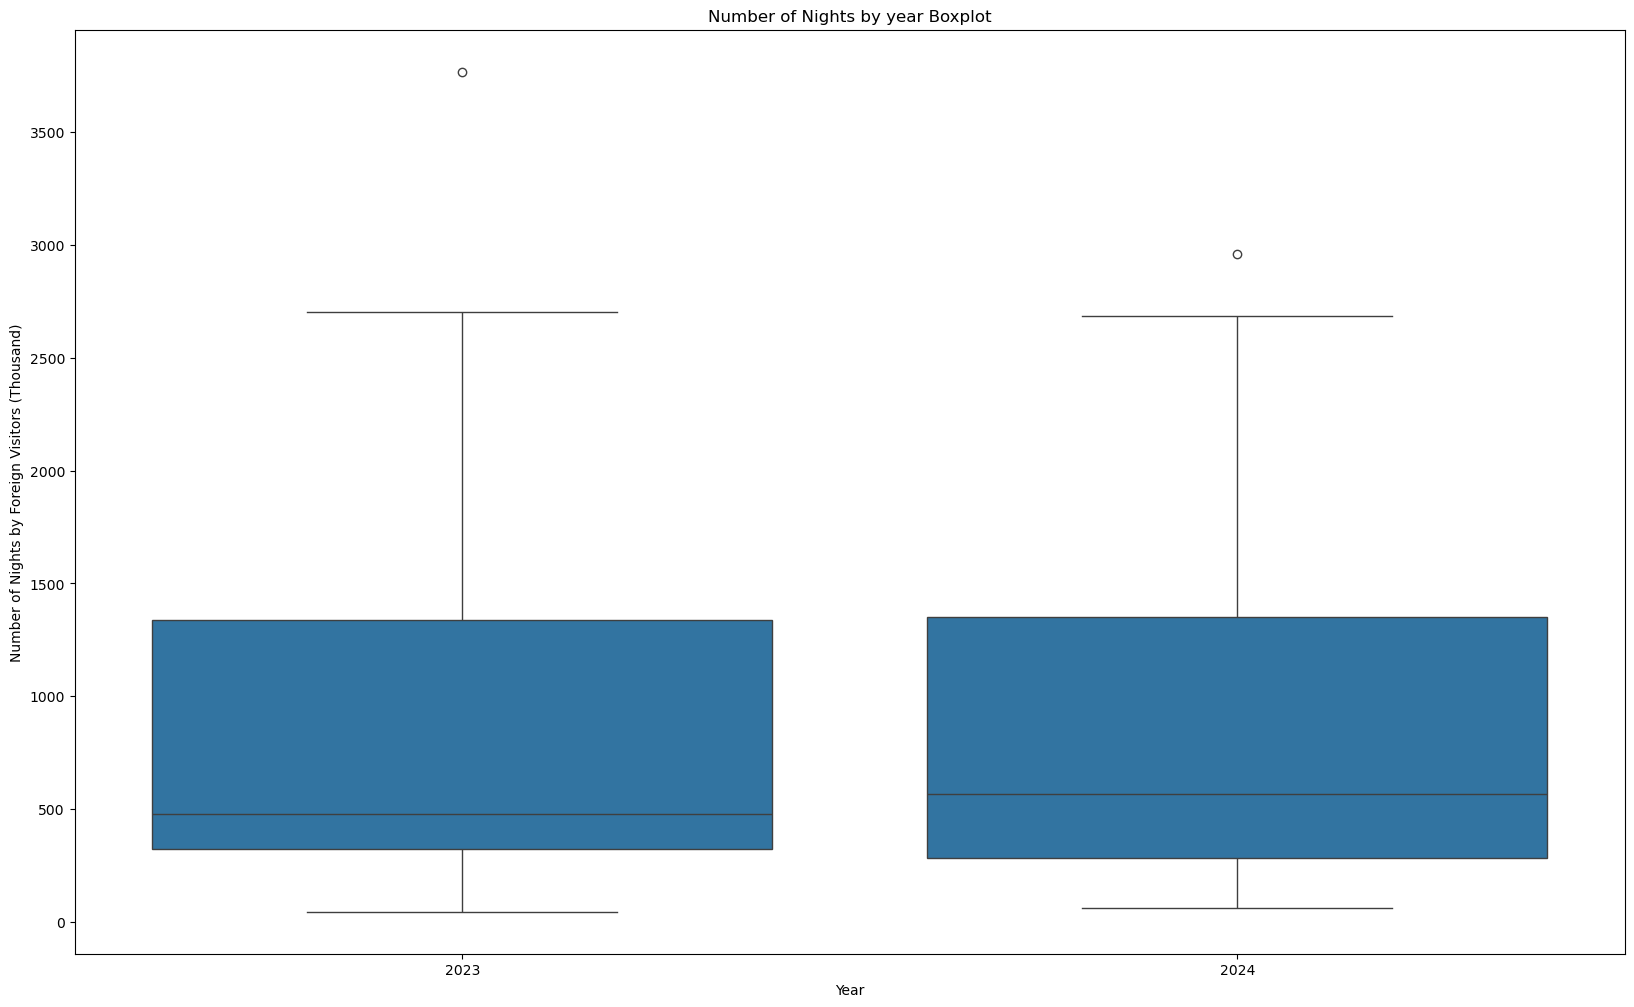

In [222]:
#Creates a boxplot to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(y='Number of Nights by Foreign Visitors (Thousand)', data=df_filtered)
plt.title('Boxplot: General distribution of Number of Nights')
plt.xlabel('General Distribution')
plt.ylabel('Number of Nights by Foreign Visitors')
plt.show()


#Creates a boxplot for each year to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Number of Nights by Foreign Visitors (Thousand)', data=df_filtered)
plt.title('Number of Nights by year Boxplot')
plt.xlabel('Year')
plt.ylabel('Number of Nights by Foreign Visitors (Thousand)')
plt.show()

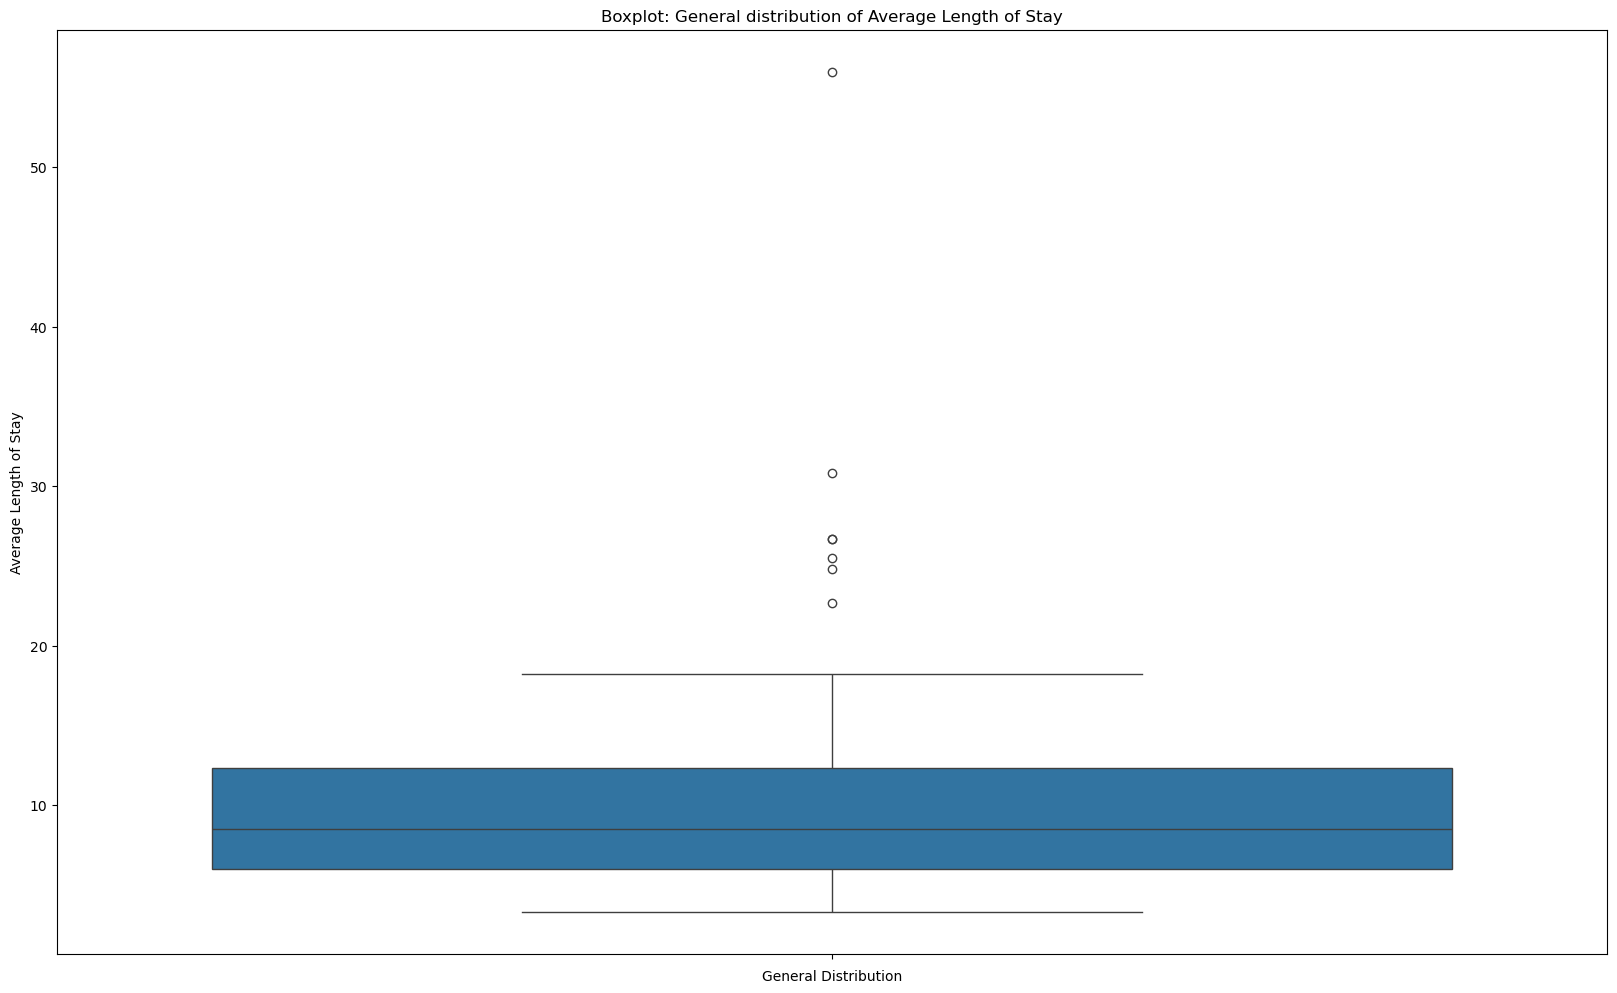

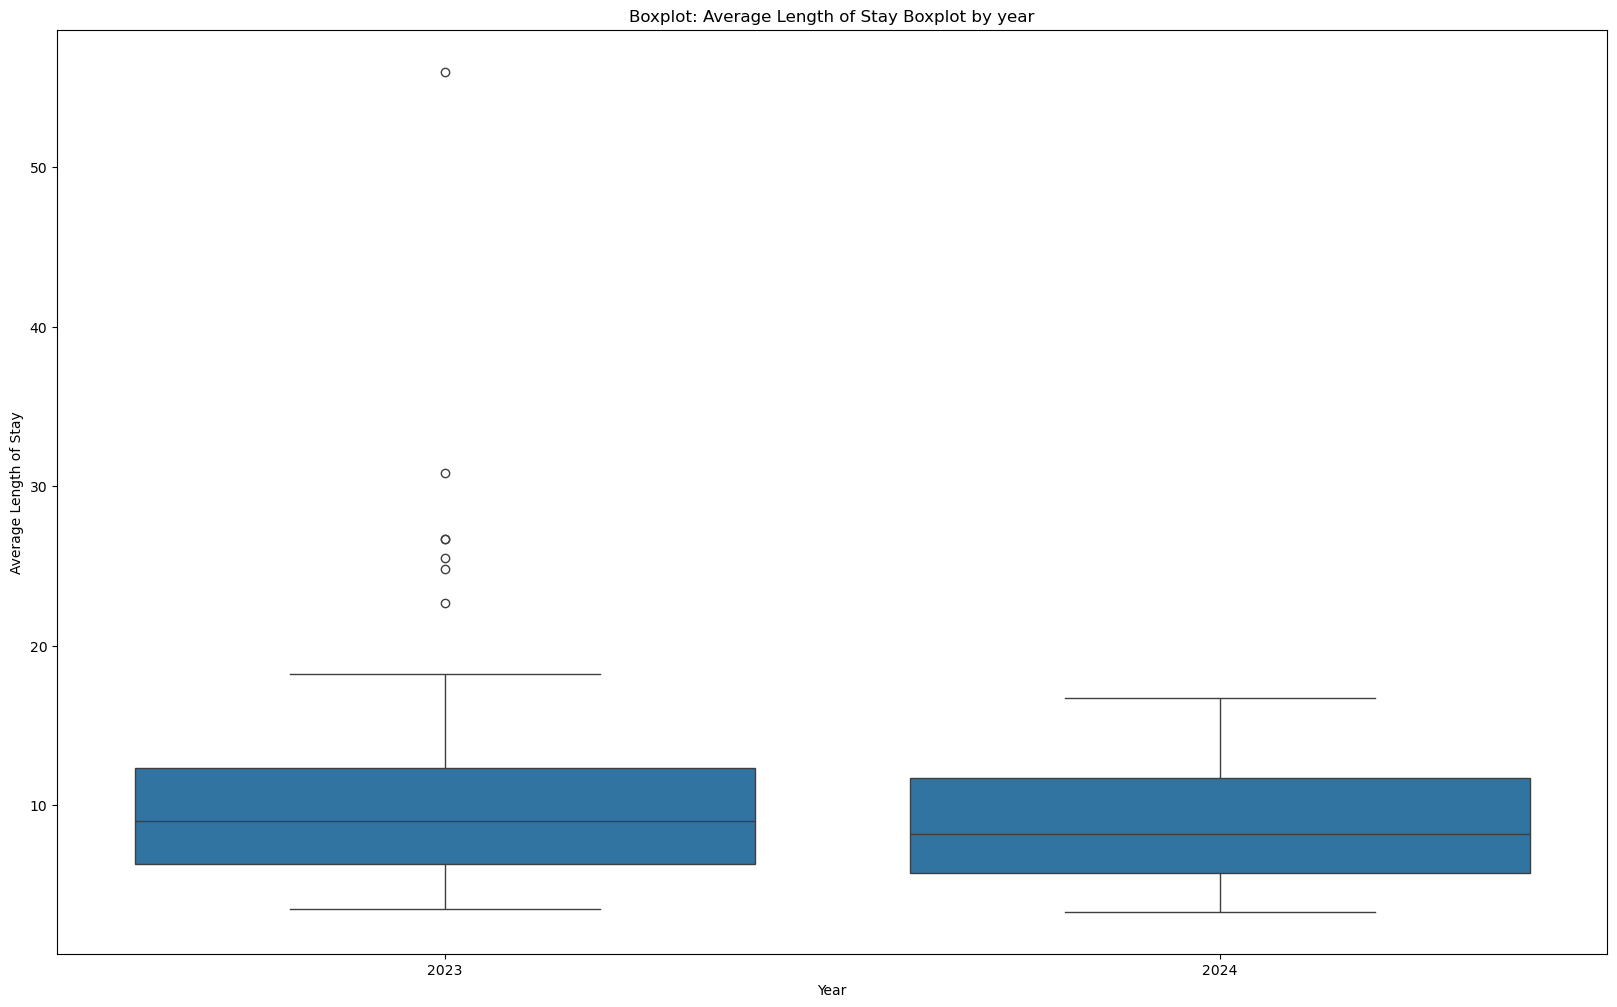

In [223]:
#Creates a boxplot to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(y='Average Length of Stay of Foreign Visitors (Nights per trip)', data=df_filtered)
plt.title('Boxplot: General distribution of Average Length of Stay')
plt.xlabel('General Distribution')
plt.ylabel('Average Length of Stay')
plt.show()


#Creates a boxplot for each year to visualize outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Average Length of Stay of Foreign Visitors (Nights per trip)', data=df_filtered)
plt.title('Boxplot: Average Length of Stay Boxplot by year')
plt.xlabel('Year')
plt.ylabel('Average Length of Stay')
plt.show()

In [224]:
#To calculate outliers with the function calculate_iqr (for each feature)
outliers = calculate_iqr(df_filtered, 'Number of Overnight Trips by Foreign Visitors (Thousand)')
outliers = calculate_iqr(df_filtered, 'Number of Nights by Foreign Visitors (Thousand)')
outliers = calculate_iqr(df_filtered, 'Average Length of Stay of Foreign Visitors (Nights per trip)')

#### Removing outliers

In [ ]:
#To delete outliers
df_no_outliers = df_filtered[~df_filtered.index.isin(outliers.index)]

#### Data without outliers

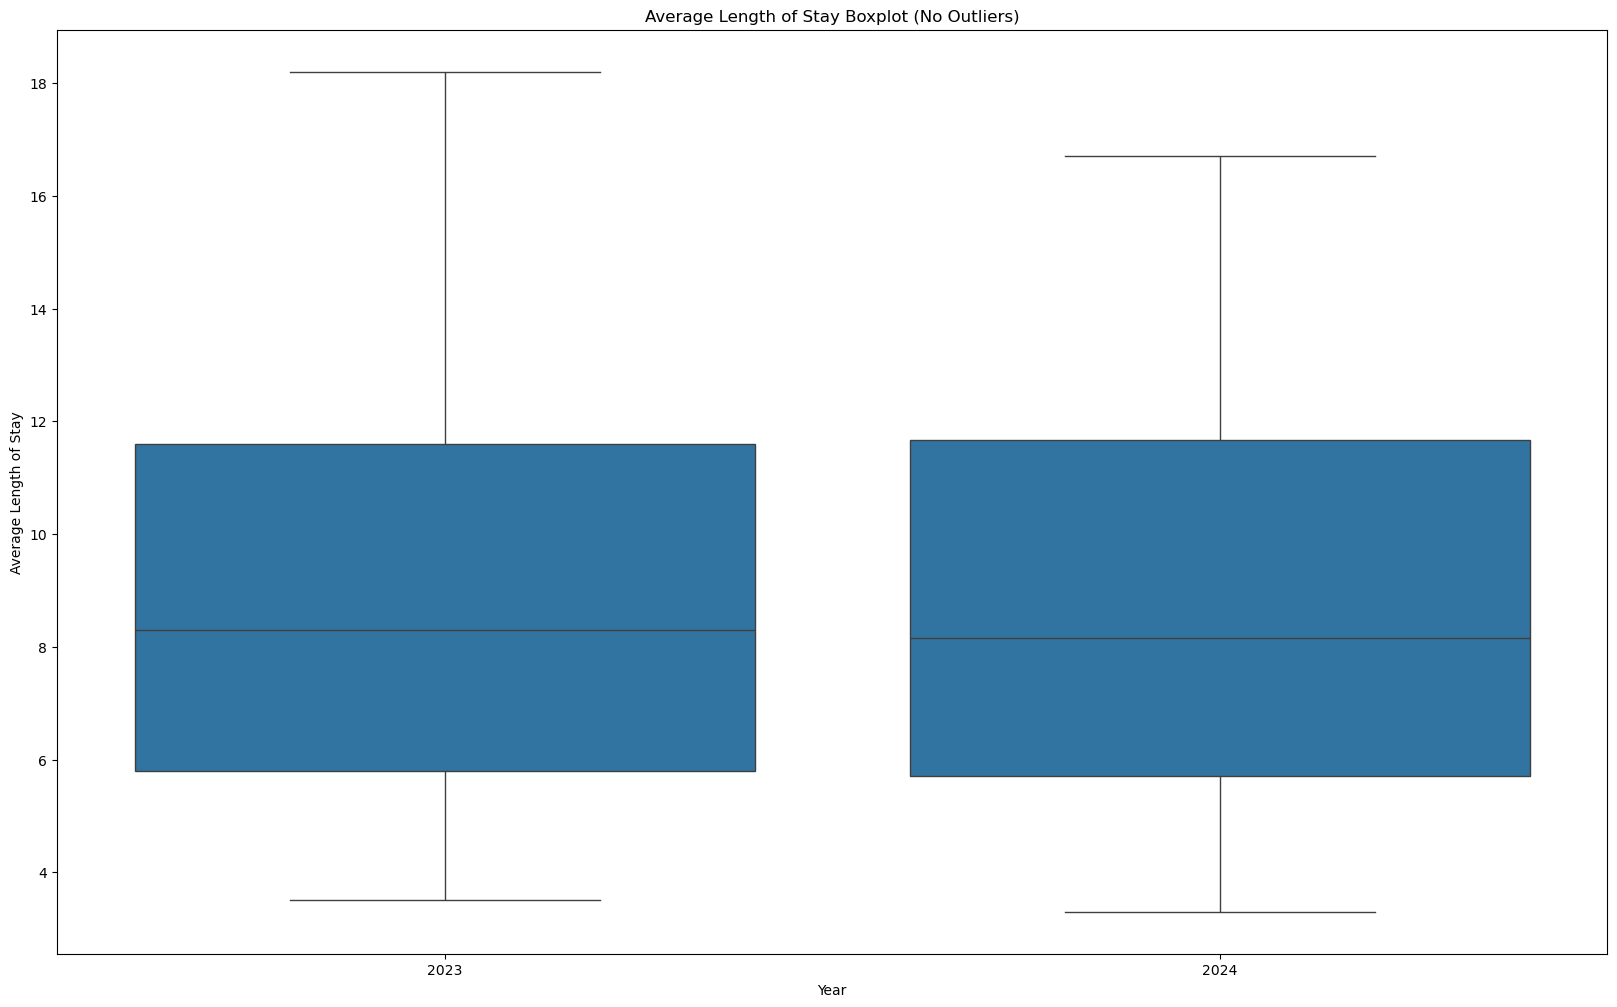

In [231]:
#Creates boxplot with no outliers
plt.figure(figsize=(20, 12))
sns.boxplot(x='Year', y='Average Length of Stay of Foreign Visitors (Nights per trip)', data=df_no_outliers)
plt.title('Average Length of Stay Boxplot (No Outliers)')
plt.xlabel('Year')
plt.ylabel('Average Length of Stay')
plt.show()

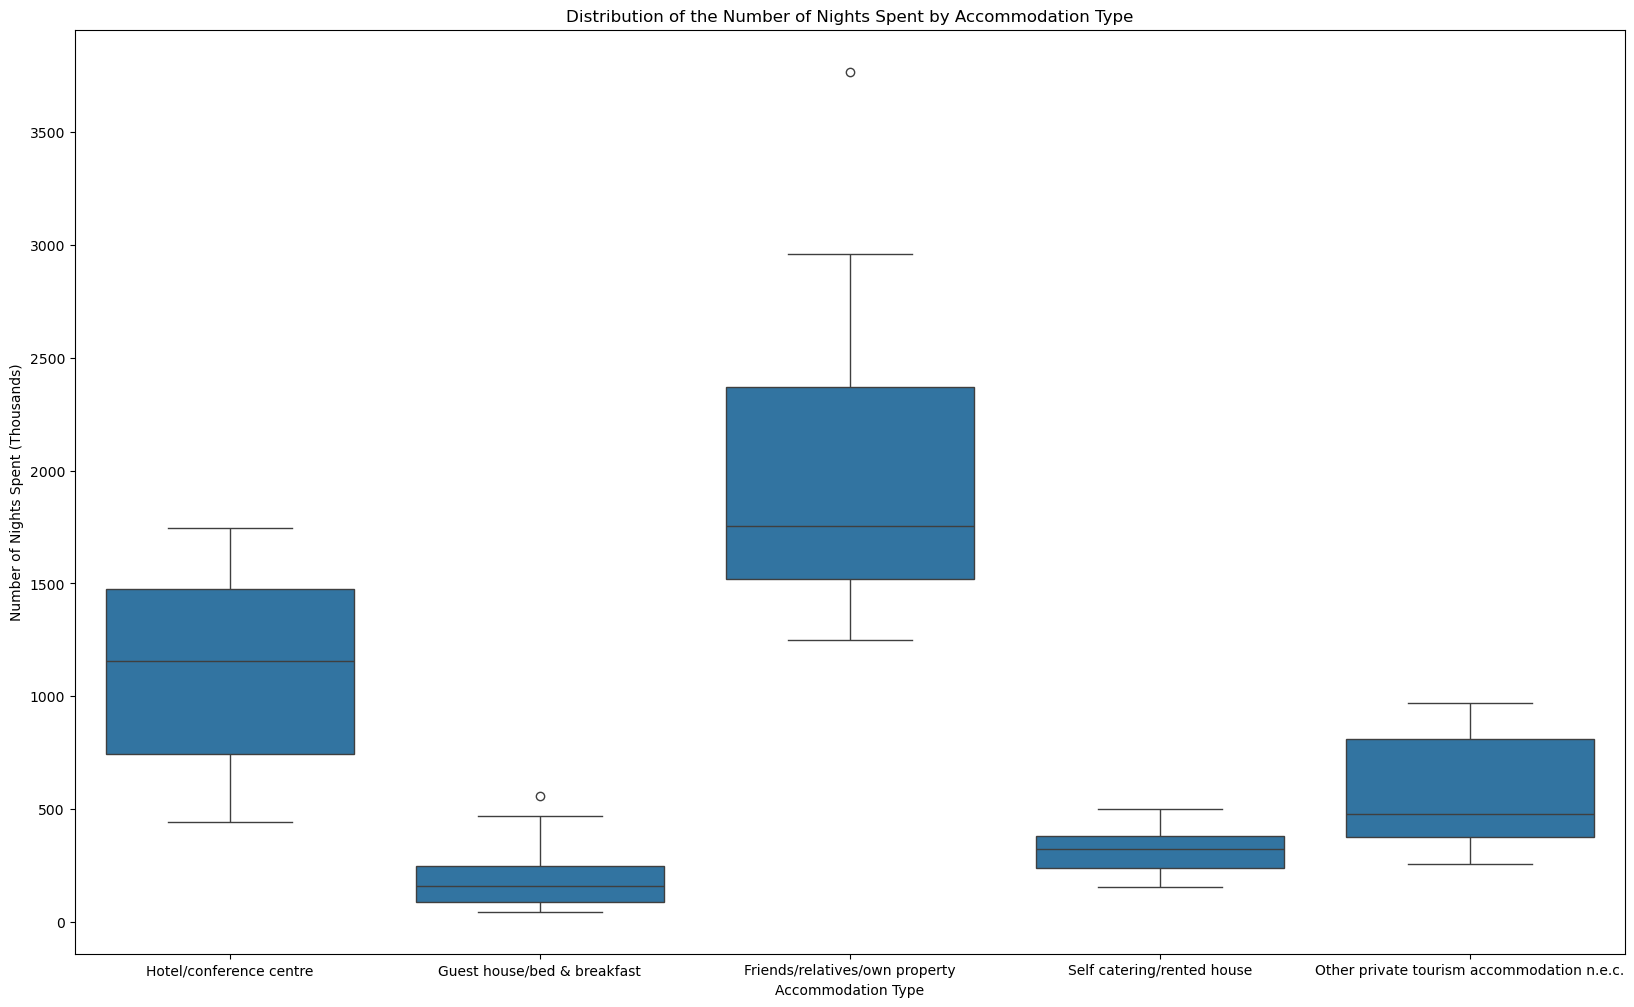

In [226]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='Main Accommodation Type', y='Number of Nights by Foreign Visitors (Thousand)', data=df_no_outliers)
plt.title('Distribution of the Number of Nights Spent by Accommodation Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Number of Nights Spent (Thousands)')
plt.show()


In [227]:
#To compare the std original and after the quartiles method
#For Average of stay
print('\nAverage Length of Stay of Foreign Visitors')
orig_std3 = df_filtered['Average Length of Stay of Foreign Visitors (Nights per trip)'].std()
processed_std3 =  df_no_outliers['Average Length of Stay of Foreign Visitors (Nights per trip)'].std()

print(f"Original std: {orig_std3}")
print(f"No outliers std: {processed_std3}")



Average Length of Stay of Foreign Visitors
Original std: 7.213189378499709
No outliers std: 3.8385623014755788


### Correlation

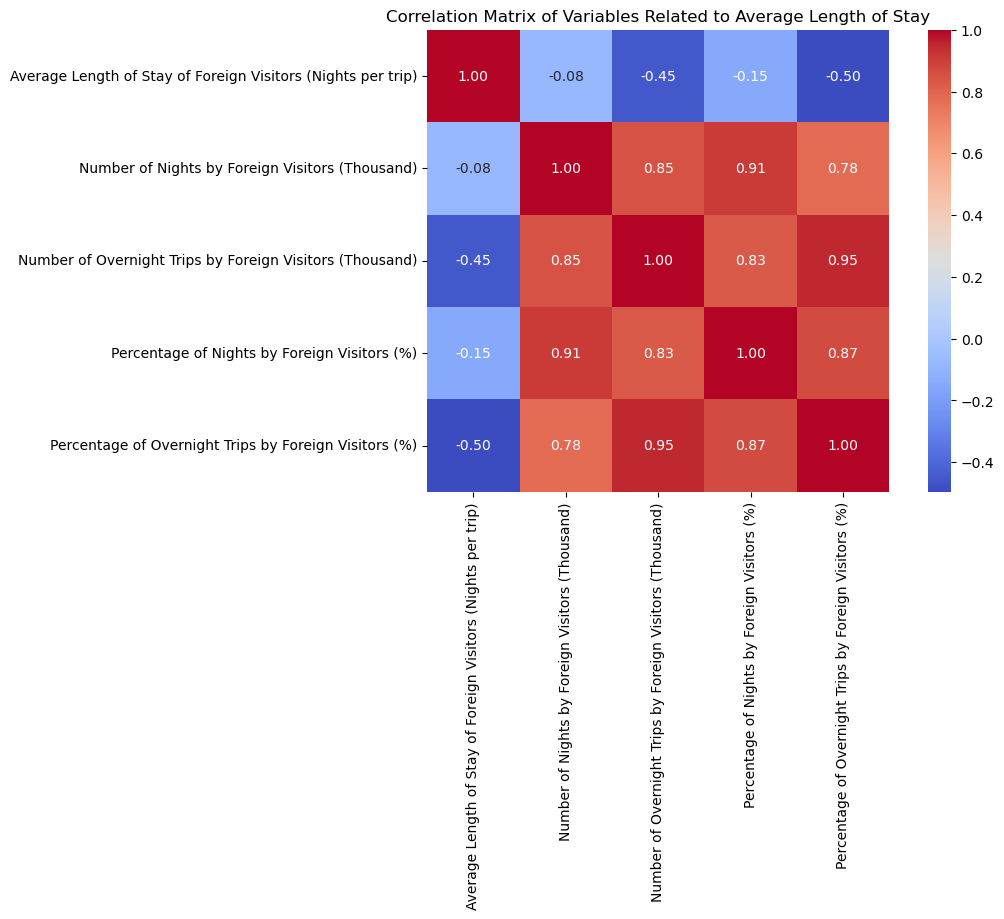

In [232]:
#Selecting variables for to correlate on the heatmap 
features = [
    'Average Length of Stay of Foreign Visitors (Nights per trip)',
    'Number of Nights by Foreign Visitors (Thousand)',
    'Number of Overnight Trips by Foreign Visitors (Thousand)',
    'Percentage of Nights by Foreign Visitors (%)',
    'Percentage of Overnight Trips by Foreign Visitors (%)'
]

#To call the function from utilss
plot_correlation_heatmap(df_no_outliers, features, title='Correlation Matrix of Variables Related to Average Length of Stay')

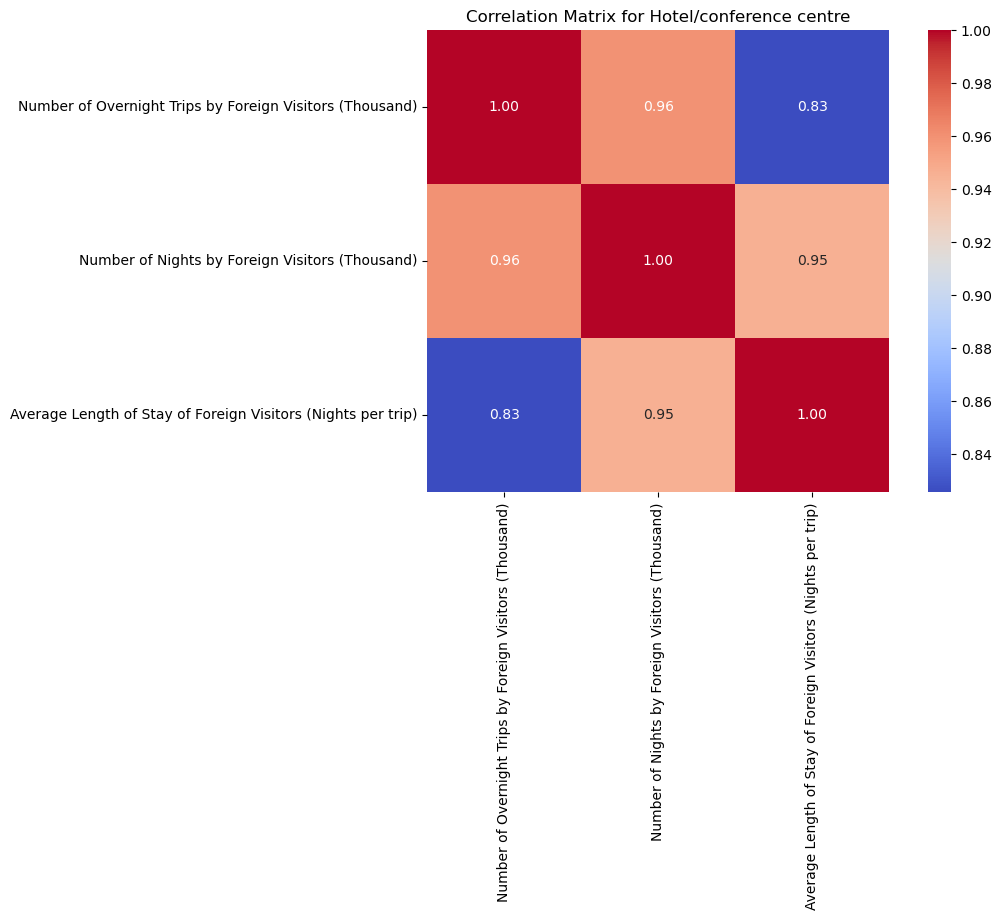

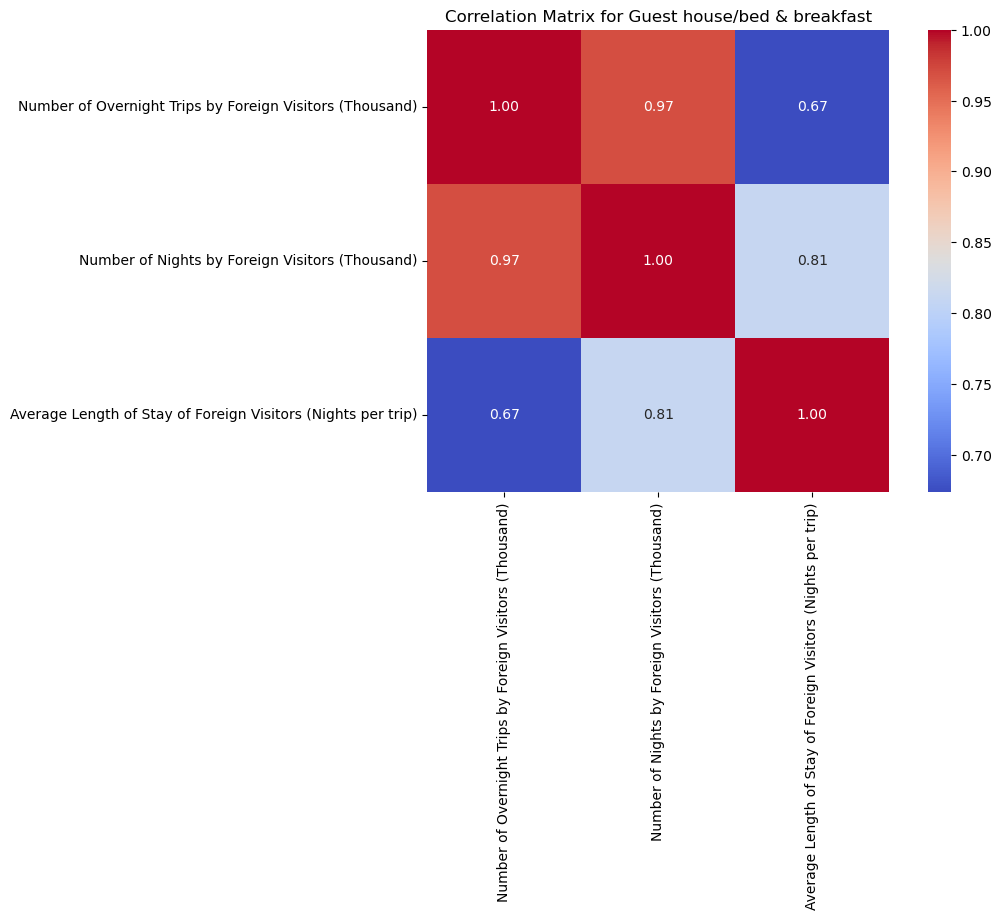

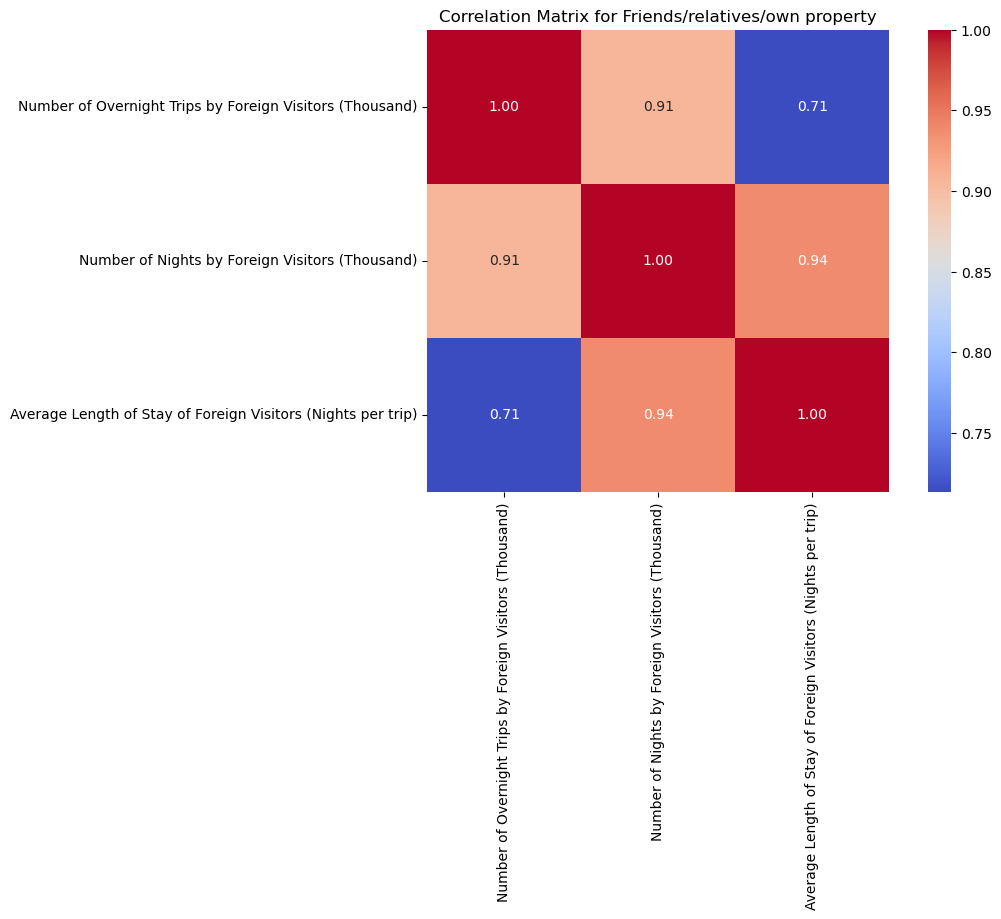

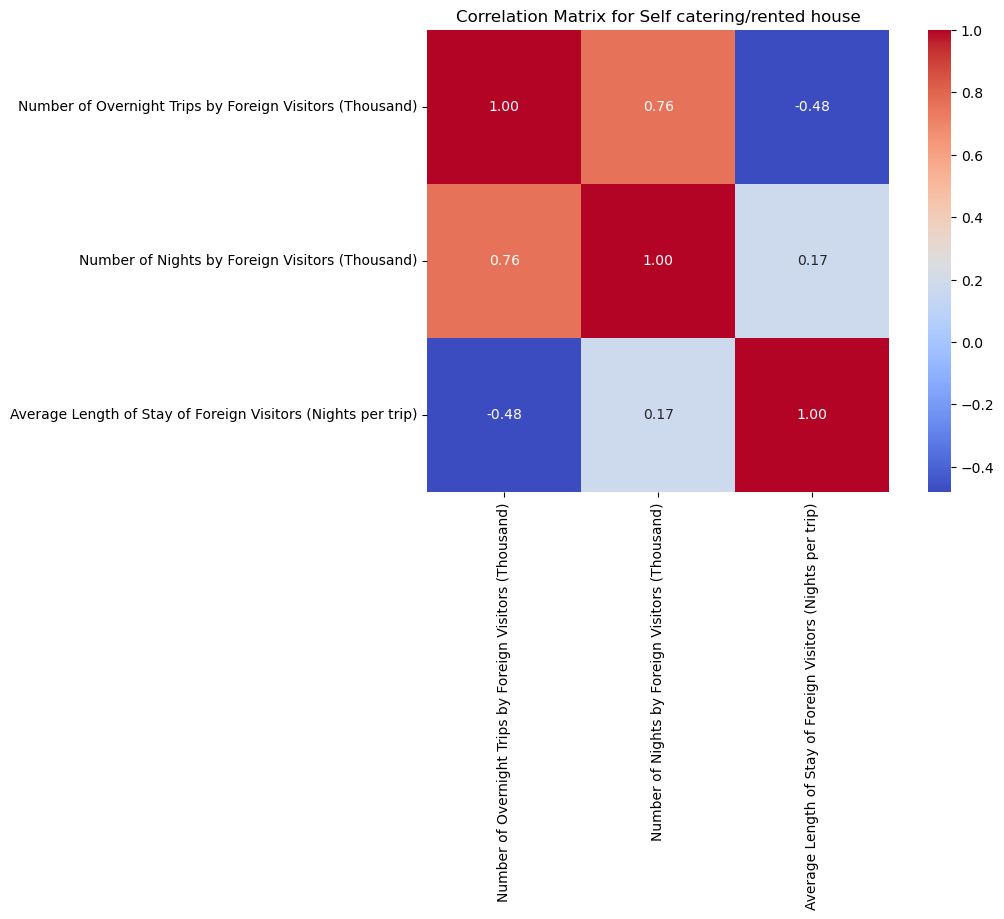

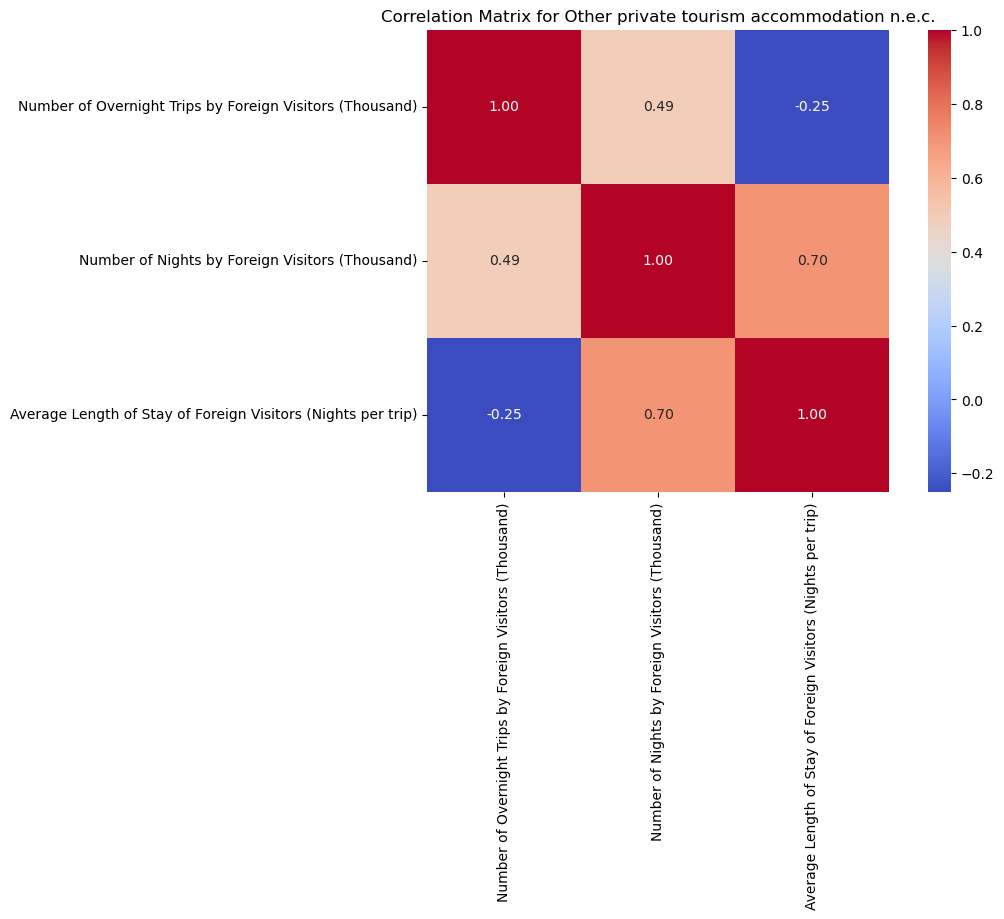

In [236]:
#To filter for each accommodation type
types_of_accommodation = df_filtered['Main Accommodation Type'].unique()

#Selecting variables for the heatmap
variables = ['Number of Overnight Trips by Foreign Visitors (Thousand)', 
             'Number of Nights by Foreign Visitors (Thousand)', 
             'Average Length of Stay of Foreign Visitors (Nights per trip)']

#Loop to generate heatmaps for each accommodation type
for accommodation_type in types_of_accommodation:
    #To filter the data for the current accommodation type
    accommodation_data = df_filtered[df_filtered['Main Accommodation Type'] == accommodation_type]
    
    #to call the function from utilss
    plot_correlation_heatmap(accommodation_data, variables, title=f'Correlation Matrix for {accommodation_type}')
